# **Data Analysis of Italian Serie A 2020-2021 dataset**
The aim of this analysis is to present and study the data of all the players from last season at the end of the preparation for Fantasy Football 22/23.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/italian-serie-a-20202021-player-stats-gazzetta/serie_a_italy_2021.csv


In [2]:
#importo il dataset e ottengo le informazioni su di esso
data = pd.read_csv('../input/italian-serie-a-20202021-player-stats-gazzetta/serie_a_italy_2021.csv')
data.dtypes


club                   object
name                   object
position               object
cost                    int64
matches_played        float64
goals                 float64
assists               float64
yellow_cards          float64
red_cards             float64
penalty_attempted     float64
penalty_scored        float64
penalty_saved         float64
avg_rating            float64
magic_avg_rating      float64
magic_total_points    float64
dtype: object

In [3]:
#ottengo alcune informazioni statistiche sul dataset
data.describe()

,cost,matches_played,goals,assists,yellow_cards,red_cards,penalty_attempted,penalty_scored,penalty_saved,avg_rating,magic_avg_rating,magic_total_points
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,12.424188,18.711191,2.025271,1.185921,2.750903,0.119134,0.270758,0.229242,0.041516,5.453718,5.578430,4.603069
std,8.276125,11.731920,3.725589,1.916829,2.745249,0.335207,1.182594,1.015153,0.282219,1.593464,1.787351,16.735451
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.500000
25%,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.660000,5.530000,-0.600000
50%,11.000000,20.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.880000,5.935000,1.000000
75%,17.000000,29.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.050000,6.370000,8.525000
max,47.000000,38.000000,29.000000,11.000000,14.000000,2.000000,13.000000,11.000000,4.000000,7.000000,8.980000,81.500000


## Analisi delle squadre
In questa prima parte del notebook viene fatta un'analisi incentrata sulle squadre nel loro complesso, non sui singoli giocatori

In [4]:
# Ordino il dataset in base alla squadra
data.sort_values('club')

,club,name,position,cost,matches_played,goals,assists,yellow_cards,red_cards,penalty_attempted,penalty_scored,penalty_saved,avg_rating,magic_avg_rating,magic_total_points
276,atalanta,Romero C.,DF,17,31.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,6.43,6.62,5.9
437,atalanta,Caldara M.,DF,9,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.66,5.50,-0.5
37,atalanta,Freuler R.,MF,23,33.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,6.57,6.84,8.9
369,atalanta,Gollini P.,GK,20,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.24,5.40,-21.0
367,atalanta,Djimsiti B.,DF,16,33.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,6.40,6.34,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,verona,Vieira R.,MF,7,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.12,6.00,-0.5
317,verona,Berardi A.,GK,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.50,6.50,0.0
405,verona,Colley E.,T,11,18.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.91,6.05,2.5
95,verona,Udogie D.,DF,1,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.90,5.80,-0.5


<AxesSubplot:title={'center':'goals distribution'}, xlabel='club'>

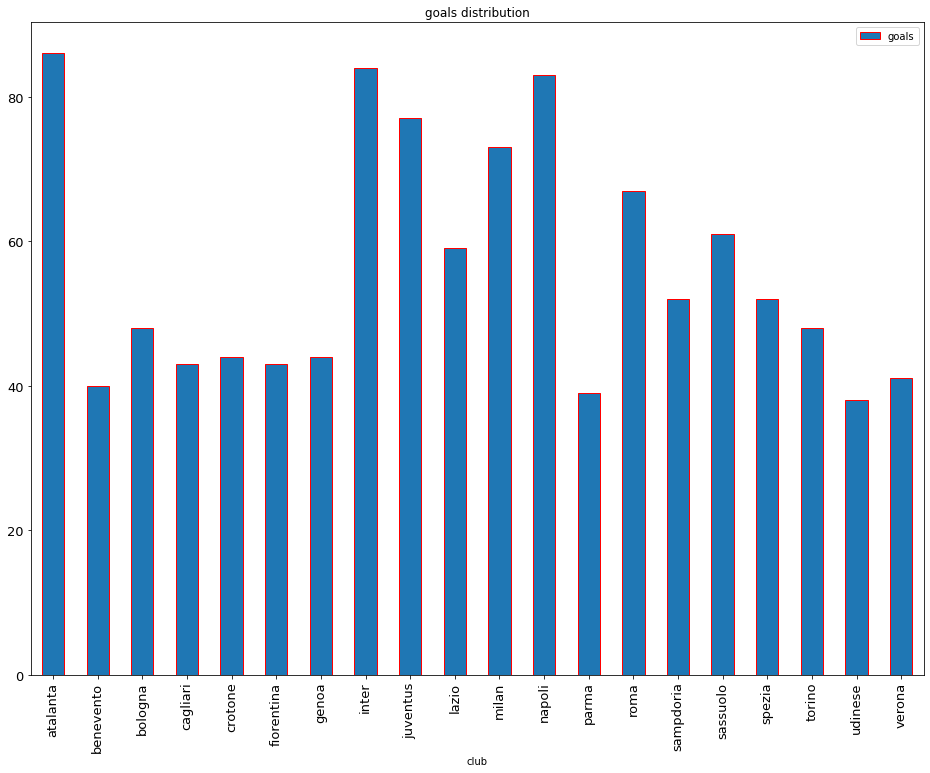

In [5]:
#analisi squadra con più goals 
data_goals = data[['club','goals']]
data_goals.set_index('club')
clubs = data_goals.groupby('club').sum()
clubs = pd.DataFrame(clubs)
clubs.plot(kind='bar',title='goals distribution', y='goals', edgecolor = 'red', figsize=(16,12), fontsize=13)

